# Spot Nuclei

- https://www.kaggle.com/c/data-science-bowl-2018
- https://www.kaggle.com/stkbailey/teaching-notebook-for-total-imaging-newbies
- https://www.kaggle.com/kmader/nuclei-overview-to-submission
- https://personal.broadinstitute.org/anne/publications/127_Caicedo_NatMethods_2019.pdf
- https://www.kaggle.com/mpware/stage1-eda-microscope-image-types-clustering

## Importing libraries 

In [1]:
# Importing libraries

# manipulating data
import numpy as np
import pandas as pd
import random

# importing data
from glob import glob
import os
import pathlib
import imageio

# image processing
from skimage.io import (imread, imshow)
from skimage.color import (rgb2gray, rgb2hsv)
from skimage.filters import threshold_otsu
from skimage import measure
from skimage import color

# clustering model
from sklearn.cluster import KMeans

# plotting data
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and exploring dataframes

In [2]:
# Loading training labels' dataframe
train_labels = pd.read_csv('stage1_train_labels.csv')

In [3]:
# Reading head of dataset
train_labels.head()

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3


In [4]:
# Number of samples
print("Number of images:", train_labels['ImageId'].unique().shape[0])
print("Number of masks:", train_labels.shape[0])

Number of images: 670
Number of masks: 29461


## Treating with color

In [5]:
# Creating image paths' object
path = 'C:/Users/larissa.nukui/AppData/Local/Programs/Python/Python37/proj_int/data_spot_nuclei/stage1_train'
training_paths = pathlib.Path(path).glob('*/images/*.png')

# Transforming object path into sorted list
training_sorted = sorted([train_path for train_path in training_paths])

In [6]:
# Converting training images' to gray scale

img_original = []
img_gray = []

for img_path in training_sorted:
    img = imageio.imread(str(img_path))
    img_original.append(img)
    img_gray.append(rgb2gray(img))

In [7]:
# Creating funtion to take image shapes

def img_shape(img_list):
    img_shape = []
    for img in img_list:
        img_shape.append(img.shape)
    return img_shape

In [8]:
# Running function to take image shapes

img_original_shape = img_shape(img_original)
img_gray_shape = img_shape(img_gray)

In [9]:
# Taking height and width for each image

img_height = []
img_width = []
    
for img in img_gray:
    height, width = img.shape
    img_height.append(height)
    img_width.append(width)

In [10]:
# Gathering image informations into dataframe

df_img = pd.DataFrame(
    {'training path': training_sorted,
     'img_original': img_original,
     'img_gray': img_gray,
     'img_original_shape': img_original_shape,
     'img_gray_shape': img_gray_shape,
     'img_height': img_height,
     'img_width': img_width,
    })

In [11]:
# Reading head of dataframe
df_img.head()

,training path,img_original,img_gray,img_original_shape,img_gray_shape,img_height,img_width
0,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[5, 5, 5, 255], [5, 5, 5, 255], [5, 5, 5, 25...","[[0.0196078431372549, 0.0196078431372549, 0.01...","(256, 256, 4)","(256, 256)",256,256
1,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[5, 5, 5, 255], [5, 5, 5, 255], [5, 5, 5, 25...","[[0.0196078431372549, 0.0196078431372549, 0.01...","(256, 256, 4)","(256, 256)",256,256
2,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[130, 62, 165, 255], [126, 56, 162, 255], [1...","[[0.3289266666666667, 0.3079121568627451, 0.30...","(256, 320, 4)","(256, 320)",256,320
3,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[179, 159, 195, 255], [182, 170, 200, 255], ...","[[0.6503749019607843, 0.6851490196078431, 0.71...","(256, 320, 4)","(256, 320)",256,320
4,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[173, 157, 195, 255], [174, 156, 194, 255], ...","[[0.6397639215686275, 0.6375090196078431, 0.62...","(256, 320, 4)","(256, 320)",256,320


In [12]:
# Counting shapes (original photos)
df_img['img_original_shape'].value_counts()

(256, 256, 4)      334
(256, 320, 4)      112
(520, 696, 4)       92
(360, 360, 4)       91
(1024, 1024, 4)     16
(512, 640, 4)       13
(603, 1272, 4)       6
(260, 347, 4)        5
(1040, 1388, 4)      1
Name: img_original_shape, dtype: int64

In [13]:
# Counting shapes (gray photos)
df_img['img_gray_shape'].value_counts()

(256, 256)      334
(256, 320)      112
(520, 696)       92
(360, 360)       91
(1024, 1024)     16
(512, 640)       13
(603, 1272)       6
(260, 347)        5
(1040, 1388)      1
Name: img_gray_shape, dtype: int64

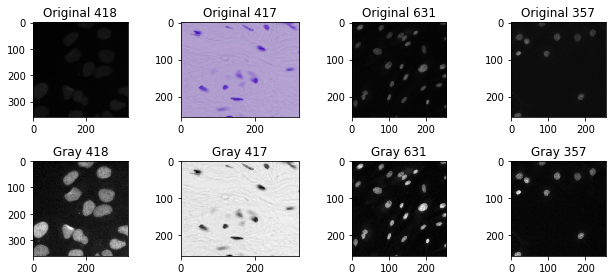

In [14]:
# Displaying random sample images

number_samples = 4

figure, axs = plt.subplots(2, number_samples, figsize=(9, 4))
for col in list(range(number_samples)):
    for img_row in random.sample(range(len(df_img)), 1):
        axs[0,col].imshow(img_original[img_row])
        axs[0,col].set_title('Original {}' .format(img_row))
        axs[1,col].imshow(img_gray[img_row], cmap='gray')
        axs[1,col].set_title('Gray {}' .format(img_row))
plt.tight_layout()

## Removing background

In [15]:
# Converting gray scale images into masks

img_gray_mask = []
for img_gray_path in img_gray:
    thresh_val = threshold_otsu(img_gray_path)
    mask = np.where(img_gray_path > thresh_val, 1, 0)
    if np.sum(mask==0) < np.sum(mask==1):
        mask = np.where(mask, 0, 1)
    img_gray_mask.append(mask)

In [16]:
# Including mask column to df_img dataframe
df_img['img_gray_mask'] = img_gray_mask

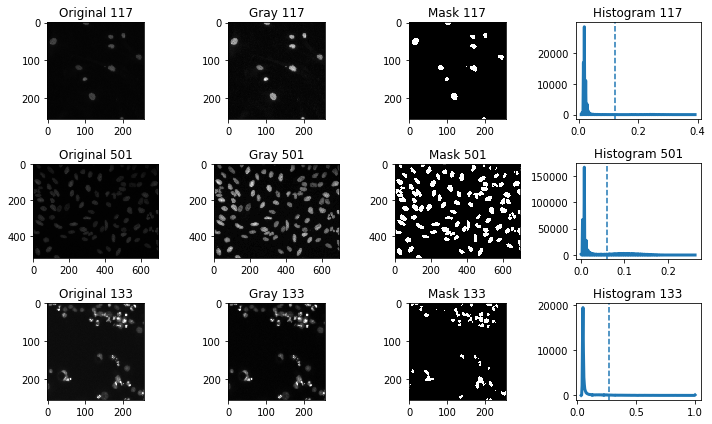

In [17]:
# Displaying random sample images
from skimage import exposure

number_samples = 3

figure, axs = plt.subplots(number_samples, 4, figsize=(10, 6))
for lin in list(range(number_samples)):
    for img_row in random.sample(range(len(df_img)), 1):
        thresh_val = threshold_otsu(img_gray[img_row])
        hist, bins_center = exposure.histogram(img_gray[img_row])
        axs[lin,0].imshow(img_original[img_row])
        axs[lin,0].set_title('Original {}' .format(img_row))
        axs[lin,1].imshow(img_gray[img_row], cmap='gray')
        axs[lin,1].set_title('Gray {}' .format(img_row))
        axs[lin,2].imshow(img_gray_mask[img_row], cmap='gray')
        axs[lin,2].set_title('Mask {}' .format(img_row))    
        axs[lin,3].plot(bins_center, hist, lw=3)
        axs[lin,3].axvline(thresh_val, ls='--')
        axs[lin,3].set_title('Histogram {}' .format(img_row))
plt.tight_layout()

## Aggregating Masks

In [18]:
# Loading training masks

# Taking image paths
nuclei_path = 'C:/Users/larissa.nukui/AppData/Local/Programs/Python/Python37/proj_int/data_spot_nuclei/stage1_train'
train_images = glob(os.path.join(nuclei_path,'*','masks','*'))

# Transforming list of paths into dataframe
train_paths = pd.DataFrame({'path': train_images})

In [19]:
# Splitting informations into columns
train_paths['imageid'] = train_paths['path'].map(lambda in_path: in_path.split('\\')[-3])
train_paths['maskid'] = train_paths['path'].map(lambda in_path: in_path.split('\\')[-1])

In [20]:
# Showing head of dataframe
train_paths.head()

,path,imageid,maskid
0,C:/Users/larissa.nukui/AppData/Local/Programs/...,00071198d059ba7f5914a526d124d28e6d010c92466da2...,07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab...
1,C:/Users/larissa.nukui/AppData/Local/Programs/...,00071198d059ba7f5914a526d124d28e6d010c92466da2...,0e548d0af63ab451616f082eb56bde13eb71f73dfda92a...
2,C:/Users/larissa.nukui/AppData/Local/Programs/...,00071198d059ba7f5914a526d124d28e6d010c92466da2...,0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5c...
3,C:/Users/larissa.nukui/AppData/Local/Programs/...,00071198d059ba7f5914a526d124d28e6d010c92466da2...,0f5a3252d05ecdf453bdd5e6ad5322c454d8ec2d13ef0f...
4,C:/Users/larissa.nukui/AppData/Local/Programs/...,00071198d059ba7f5914a526d124d28e6d010c92466da2...,2c47735510ef91a11fde42b317829cee5fc04d05a797b9...


In [21]:
# Shape of dataframe
train_paths.shape

(29461, 3)

In [22]:
# Taking mask images' informations

mask = []
for mask_path in train_paths['path']:
    img = imageio.imread(str(mask_path))
    mask.append(img)

In [23]:
# Including mask column into train_paths dataframe
train_paths['mask'] = mask

In [24]:
# Shape of dataframe
train_paths.shape

(29461, 4)

In [25]:
# Gathering all masks from each image

dict_masks = {}
dict_masks_qty = {}
for row in list(range(len(train_paths))):
    if train_paths['imageid'][row] not in dict_masks.keys():
        dict_masks[train_paths['imageid'][row]] = train_paths['mask'][row]
        dict_masks_qty[train_paths['imageid'][row]] = 1       
    else:
        dict_masks[train_paths['imageid'][row]] += train_paths['mask'][row]
        dict_masks_qty[train_paths['imageid'][row]] += 1

In [26]:
# Converting dictionary into dataframe
img_gray_train = [masks for masks in dict_masks.values()]
total_masks = [masks for masks in dict_masks_qty.values()]

In [27]:
# Normalizing data (values from 0 to 1)

img_train = []
for img in img_gray_train:
    train_mask = np.where(img > 0, 1, 0)
    if np.sum(train_mask==0) < np.sum(train_mask==1):
        train_mask = np.where(train_mask, 0, 1)
    img_train.append(train_mask)

In [28]:
# Including mask column to df_img dataframe
df_img['img_gray_train'] = img_train
df_img['total_masks'] = total_masks

In [29]:
# Showing head of dataframe
df_img.head()

,training path,img_original,img_gray,img_original_shape,img_gray_shape,img_height,img_width,img_gray_mask,img_gray_train,total_masks
0,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[5, 5, 5, 255], [5, 5, 5, 255], [5, 5, 5, 25...","[[0.0196078431372549, 0.0196078431372549, 0.01...","(256, 256, 4)","(256, 256)",256,256,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",27
1,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[5, 5, 5, 255], [5, 5, 5, 255], [5, 5, 5, 25...","[[0.0196078431372549, 0.0196078431372549, 0.01...","(256, 256, 4)","(256, 256)",256,256,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",36
2,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[130, 62, 165, 255], [126, 56, 162, 255], [1...","[[0.3289266666666667, 0.3079121568627451, 0.30...","(256, 320, 4)","(256, 320)",256,320,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,...",70
3,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[179, 159, 195, 255], [182, 170, 200, 255], ...","[[0.6503749019607843, 0.6851490196078431, 0.71...","(256, 320, 4)","(256, 320)",256,320,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",86
4,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[173, 157, 195, 255], [174, 156, 194, 255], ...","[[0.6397639215686275, 0.6375090196078431, 0.62...","(256, 320, 4)","(256, 320)",256,320,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",7


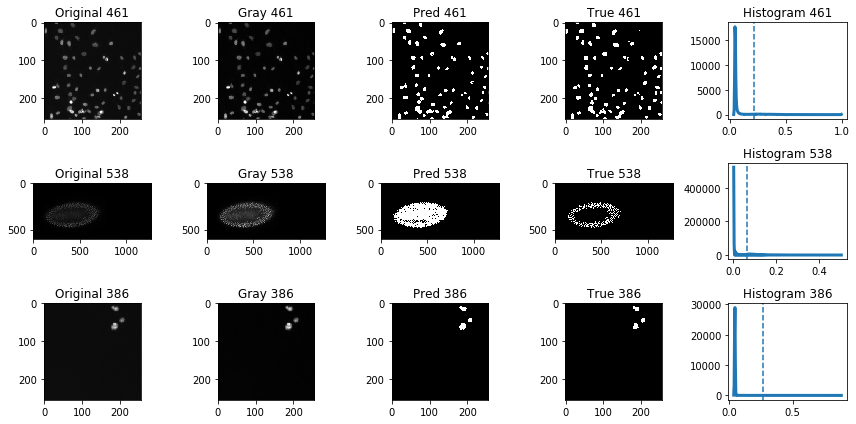

In [30]:
# Displaying random sample images
from skimage import exposure

number_samples = 3

figure, axs = plt.subplots(number_samples, 5, figsize=(12, 6))
for lin in list(range(number_samples)):
    for img_row in random.sample(range(len(df_img)), 1):
        thresh_val = threshold_otsu(img_gray[img_row])
        hist, bins_center = exposure.histogram(img_gray[img_row])
        axs[lin,0].imshow(img_original[img_row])
        axs[lin,0].set_title('Original {}' .format(img_row))
        axs[lin,1].imshow(img_gray[img_row], cmap='gray')
        axs[lin,1].set_title('Gray {}' .format(img_row))
        axs[lin,2].imshow(img_gray_mask[img_row], cmap='gray')
        axs[lin,2].set_title('Pred {}' .format(img_row))
        axs[lin,3].imshow(img_gray_train[img_row], cmap='gray')
        axs[lin,3].set_title('True {}' .format(img_row))
        axs[lin,4].plot(bins_center, hist, lw=3)
        axs[lin,4].axvline(thresh_val, ls='--')
        axs[lin,4].set_title('Histogram {}' .format(img_row))
plt.tight_layout()

## Measuring accuracy

In [31]:
# Creating lists of scores
from sklearn.metrics import jaccard_score

scores = []
for row in list(range(len(df_img))):
    scores.append(jaccard_score(df_img['img_gray_train'][row], df_img['img_gray_mask'][row], average='micro'))

In [32]:
# Including score column to df_img dataframe
df_img['score'] = scores

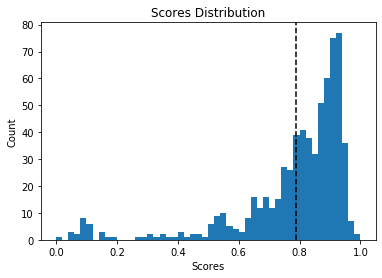

In [33]:
# Plotting scores
plt.hist(df_img['score'], bins=50)
plt.title('Scores Distribution')
plt.xlabel('Scores')
plt.axvline(df_img['score'].mean(), color='k', ls='--')
plt.ylabel('Count');

In [34]:
# Scores' information
df_img['score'].describe()

count    670.000000
mean       0.787309
std        0.185812
min        0.000000
25%        0.747306
50%        0.842851
75%        0.906570
max        1.000000
Name: score, dtype: float64

In [35]:
# Setting quarters
g1, g2, g3, g4 = 0.2, 0.4, 0.6, 0.8

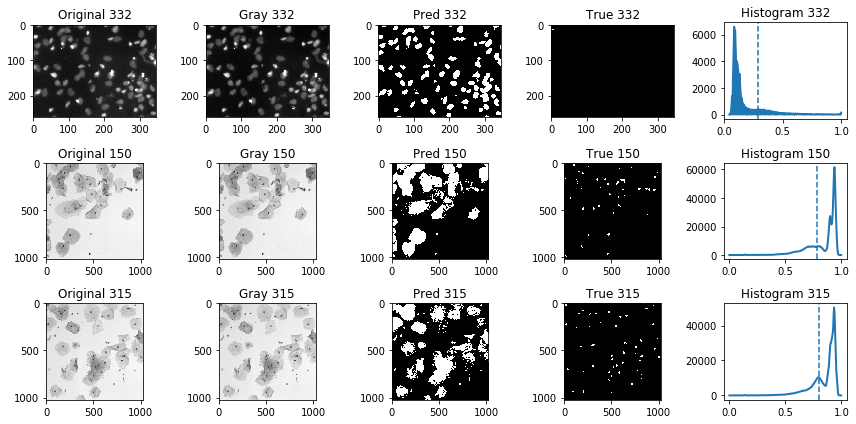

In [36]:
# Displaying worst scores' samples
from skimage import exposure

n_smallest = 3
smallest = df_img.nsmallest(n_smallest, 'score').index
list_smallest = list(smallest)

figure, axs = plt.subplots(n_smallest, 5, figsize=(12, 6))
for lin in list(range(n_smallest)):
    img = list_smallest[lin]
    thresh_val = threshold_otsu(img_gray[img])
    hist, bins_center = exposure.histogram(img_gray[img])
    axs[lin,0].imshow(img_original[img])
    axs[lin,0].set_title('Original {}'.format(img))
    axs[lin,1].imshow(img_gray[img], cmap='gray')
    axs[lin,1].set_title('Gray {}'.format(img))
    axs[lin,2].imshow(img_gray_mask[img], cmap='gray')
    axs[lin,2].set_title('Pred {}'.format(img)) 
    axs[lin,3].imshow(img_gray_train[img], cmap='gray')
    axs[lin,3].set_title('True {}'.format(img))
    axs[lin,4].plot(bins_center, hist, lw=2)
    axs[lin,4].axvline(thresh_val, ls='--')
    axs[lin,4].set_title('Histogram {}'.format(img))        
plt.tight_layout()

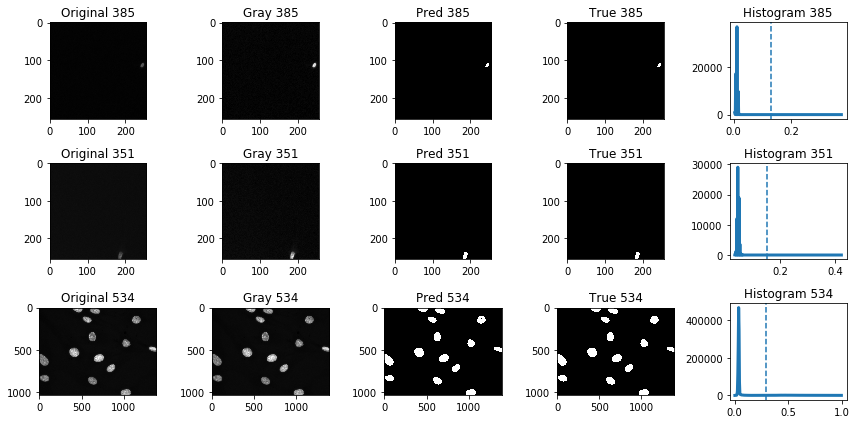

In [37]:
# Displaying best scores' samples
from skimage import exposure

n_largest = 3
largest = df_img.nlargest(n_largest, 'score').index
list_largest = list(largest)

figure, axs = plt.subplots(n_largest, 5, figsize=(12, 6))
for lin in list(range(n_largest)):
    img = list_largest[lin]
    thresh_val = threshold_otsu(img_gray[img])
    hist, bins_center = exposure.histogram(img_gray[img])
    axs[lin,0].imshow(img_original[img])
    axs[lin,0].set_title('Original {}'.format(img))
    axs[lin,1].imshow(img_gray[img], cmap='gray')
    axs[lin,1].set_title('Gray {}'.format(img))
    axs[lin,2].imshow(img_gray_mask[img], cmap='gray')
    axs[lin,2].set_title('Pred {}'.format(img)) 
    axs[lin,3].imshow(img_gray_train[img], cmap='gray')
    axs[lin,3].set_title('True {}'.format(img))
    axs[lin,4].plot(bins_center, hist, lw=3)
    axs[lin,4].axvline(thresh_val, ls='--')
    axs[lin,4].set_title('Histogram {}'.format(img))
plt.tight_layout()

In [38]:
# Creating quarter column
df_img['group'] = [0]*670

In [39]:
# Setting quarter bins
df_img.loc[(df_img['score'] <  g1), 'group'] = 1
df_img.loc[(df_img['score'] >= g1) & (df_img['score'] < g2), 'group'] = 2
df_img.loc[(df_img['score'] >= g2) & (df_img['score'] < g3), 'group'] = 3
df_img.loc[(df_img['score'] >= g3) & (df_img['score'] < g4), 'group'] = 4

In [40]:
# Creating separeted dataframes according to scores
df_img_g1 = df_img[df_img['group']==1]
df_img_g2 = df_img[df_img['group']==2]
df_img_g3 = df_img[df_img['group']==3]
df_img_g4 = df_img[df_img['group']==4]

In [41]:
# Transforming in list
img_original_g1 = df_img_g1['img_original'].tolist()
img_gray_mask_g1 = df_img_g1['img_gray_mask'].tolist()
img_gray_train_g1 = df_img_g1['img_gray_train'].tolist()

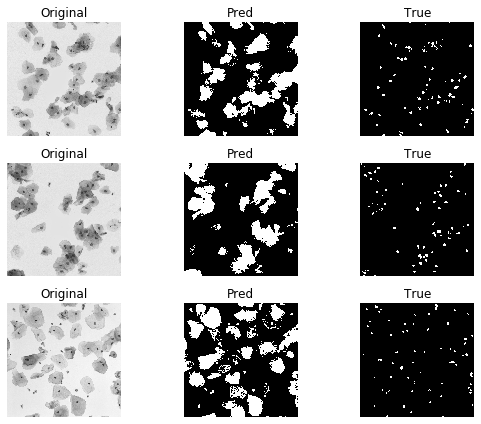

In [42]:
# Displaying random sample images

number_samples = 3

figure, axs = plt.subplots(number_samples, 3, figsize=(8, 6))
for lin in list(range(number_samples)):
    for img_row in random.sample(range(len(df_img_g1)), 1):
        axs[lin,0].imshow(img_original_g1[img_row])
        axs[lin,0].set_title('Original')
        axs[lin,0].axis('off')
        axs[lin,1].imshow(img_gray_mask_g1[img_row], cmap='gray')
        axs[lin,1].set_title('Pred')
        axs[lin,1].axis('off')
        axs[lin,2].imshow(img_gray_train_g1[img_row], cmap='gray')
        axs[lin,2].set_title('True')
        axs[lin,2].axis('off')
plt.tight_layout()

In [43]:
# Count images according to scores
print('Scores < 0.2:', len(df_img_g1))
print('Scores < 0.4:', len(df_img_g2))
print('Scores < 0.6:', len(df_img_g3))
print('Scores < 0.8:', len(df_img_g4))

Scores < 0.2: 25
Scores < 0.4: 9
Scores < 0.6: 43
Scores < 0.8: 174


## Clustering images by color

In [44]:
# Converting training rbg images' to hsv format

img_hsv = []
for img_path in training_sorted:
    img = imageio.imread(str(img_path))
    img = img[:, :, :3]
    img_hsv.append(rgb2hsv(img))

In [45]:
# Including img_hsv column to df_img dataframe
df_img['img_hsv'] = img_hsv

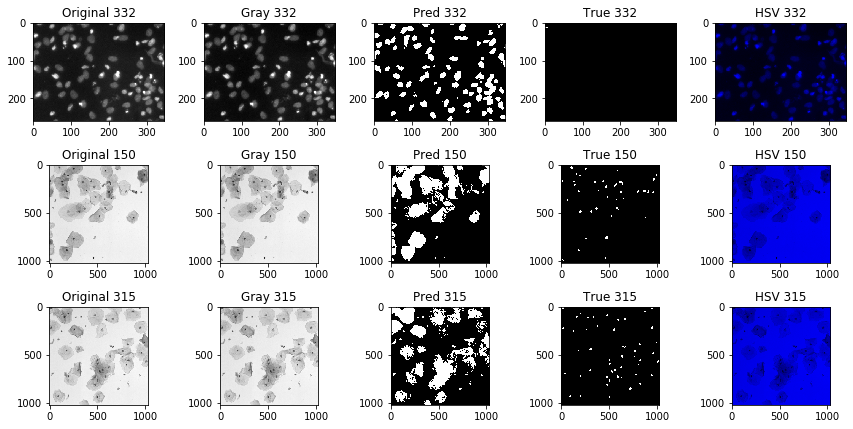

In [46]:
# Displaying worst scores' samples
from skimage import exposure

n_smallest = 3
smallest = df_img.nsmallest(n_smallest, 'score').index
list_smallest = list(smallest)

figure, axs = plt.subplots(n_smallest, 5, figsize=(12, 6))
for lin in list(range(n_smallest)):
    img = list_smallest[lin]
    axs[lin,0].imshow(img_original[img])
    axs[lin,0].set_title('Original {}'.format(img))
    axs[lin,1].imshow(img_gray[img], cmap='gray')
    axs[lin,1].set_title('Gray {}'.format(img))
    axs[lin,2].imshow(img_gray_mask[img], cmap='gray')
    axs[lin,2].set_title('Pred {}'.format(img)) 
    axs[lin,3].imshow(img_gray_train[img], cmap='gray')
    axs[lin,3].set_title('True {}'.format(img))
    axs[lin,4].imshow(img_hsv[img])
    axs[lin,4].set_title('HSV {}'.format(img))   
plt.tight_layout()

In [47]:
def get_domimant_colors(img, top_colors=2):
    
    img_l = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
    clf = KMeans(n_clusters=top_colors)
    clf.fit(img_l)
    
    # grab the number of different clusters and create a histogram based on the number of pixels assigned to each cluster
    num_labels = np.arange(0, len(np.unique(clf.labels_)) + 1)
    (hist, _) = np.histogram(clf.labels_, bins = num_labels)
    
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return clf.cluster_centers_, hist

In [48]:
# Taking dominant color for each image

dominant_color = []
for img in img_hsv:
    dominant_colors, _ = get_domimant_colors(img, top_colors=1)
    dominant_colors = dominant_colors.reshape(1, dominant_colors.shape[0] * dominant_colors.shape[1])
    dominant_color.append(dominant_colors.squeeze())

In [49]:
# Including dominant column into df_img dataframe
df_img['dominant_color'] = dominant_color

In [50]:
# Showing head of dataframe
df_img.head()

,training path,img_original,img_gray,img_original_shape,img_gray_shape,img_height,img_width,img_gray_mask,img_gray_train,total_masks,score,group,img_hsv,dominant_color
0,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[5, 5, 5, 255], [5, 5, 5, 255], [5, 5, 5, 25...","[[0.0196078431372549, 0.0196078431372549, 0.01...","(256, 256, 4)","(256, 256)",256,256,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",27,0.697527,4,"[[[0.0, 0.0, 0.0196078431372549], [0.0, 0.0, 0...","[0.0, 0.0, 0.02408716538373055]"
1,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[5, 5, 5, 255], [5, 5, 5, 255], [5, 5, 5, 25...","[[0.0196078431372549, 0.0196078431372549, 0.01...","(256, 256, 4)","(256, 256)",256,256,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",36,0.915557,0,"[[[0.0, 0.0, 0.0196078431372549], [0.0, 0.0, 0...","[0.0, 0.0, 0.035367060642616806]"
2,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[130, 62, 165, 255], [126, 56, 162, 255], [1...","[[0.3289266666666667, 0.3079121568627451, 0.30...","(256, 320, 4)","(256, 320)",256,320,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,...",70,0.801662,0,"[[[0.7766990291262136, 0.6242424242424243, 0.6...","[0.6969922721241343, 0.2417388976327306, 0.760..."
3,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[179, 159, 195, 255], [182, 170, 200, 255], ...","[[0.6503749019607843, 0.6851490196078431, 0.71...","(256, 320, 4)","(256, 320)",256,320,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",86,0.647762,4,"[[[0.7592592592592592, 0.18461538461538454, 0....","[0.6439642758207026, 0.2101760172412249, 0.803..."
4,C:\Users\larissa.nukui\AppData\Local\Programs\...,"[[[173, 157, 195, 255], [174, 156, 194, 255], ...","[[0.6397639215686275, 0.6375090196078431, 0.62...","(256, 320, 4)","(256, 320)",256,320,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",7,0.775129,4,"[[[0.736842105263158, 0.19487179487179476, 0.7...","[0.7435220601544179, 0.2324891863323699, 0.786..."


In [51]:
# Predicting cluster for each image
X = pd.DataFrame(df_img['dominant_color'].values.tolist()).to_numpy()
clf = KMeans(n_clusters=3).fit(X)
clusters = clf.predict(X)

In [52]:
# Including cluster column into df_img dataframe
df_img['clusters'] = clusters

In [53]:
# Couting images for each cluster
P = df_img.groupby(clusters)['training path'].count().reset_index()
P['Percentage'] = 100*P['training path']/P['training path'].sum()
P.round(2)

,index,training path,Percentage
0,0,546,81.49
1,1,108,16.12
2,2,16,2.39


In [54]:
# Creating funtion to plot samples
def plot_images(df, rows, cols):
    figure, axs = plt.subplots(rows, cols, figsize=(16,rows*2))
    for row in range(rows):
        for col in range(cols):
            img = df['img_original'][row*cols + col]
            height, width, _ = img.shape
            ax = axs[row,col]
            ax.axis('off')
            ax.set_title("%dx%d"%(width, height))
            ax.imshow(img)

In [55]:
# Creating dataframe for each cluster
df_cluster_0 = pd.DataFrame(df_img.loc[df_img['clusters']==0, 'img_original']).reset_index()
df_cluster_1 = pd.DataFrame(df_img.loc[df_img['clusters']==1, 'img_original']).reset_index()
df_cluster_2 = pd.DataFrame(df_img.loc[df_img['clusters']==2, 'img_original']).reset_index()

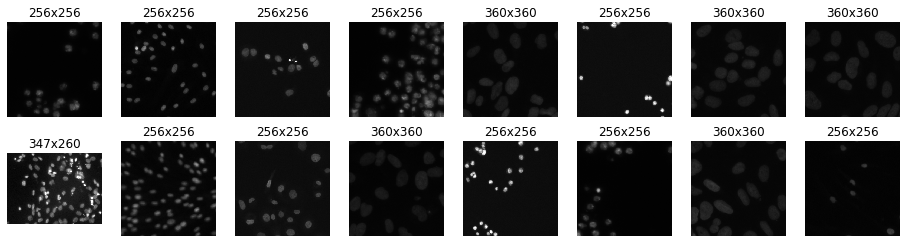

In [59]:
# Displaying samples of cluster 0
plot_images(df_cluster_0, 2, 8)

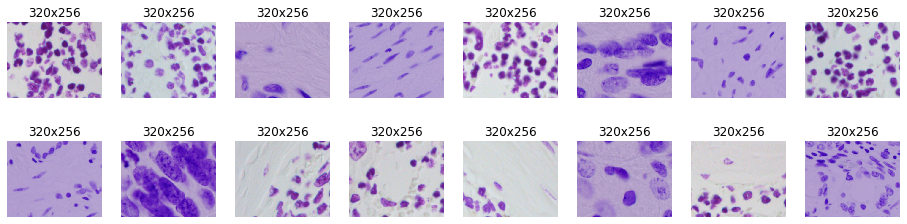

In [60]:
# Displaying samples of cluster 1
plot_images(df_cluster_1, 2, 8)

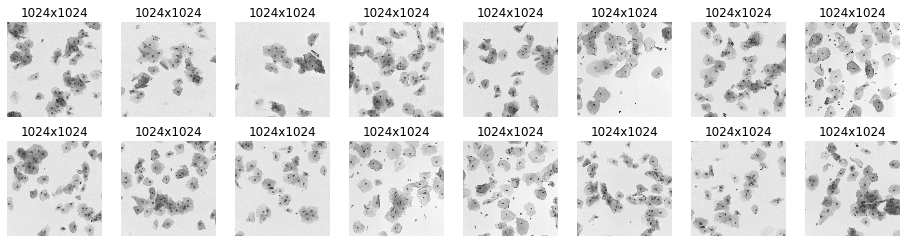

In [61]:
# Displaying samples of cluster 2
plot_images(df_cluster_2, 2, 8)

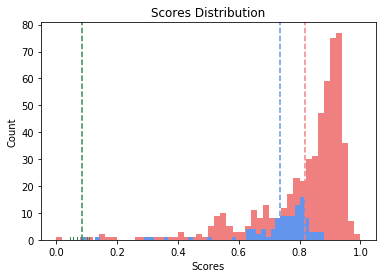

In [62]:
# Plotting scores by cluster
plt.hist(df_img.loc[df_img['clusters']==0, 'score'], color='lightcoral', bins=50)
plt.hist(df_img.loc[df_img['clusters']==1, 'score'], color='cornflowerblue', bins=50)
plt.hist(df_img.loc[df_img['clusters']==2, 'score'], color='seagreen', bins=50)
plt.title('Scores Distribution')
plt.axvline(df_img.loc[df_img['clusters']==0, 'score'].mean(), color='lightcoral', ls='--')
plt.axvline(df_img.loc[df_img['clusters']==1, 'score'].mean(), color='cornflowerblue', ls='--')
plt.axvline(df_img.loc[df_img['clusters']==2, 'score'].mean(), color='seagreen', ls='--')
plt.xlabel('Scores')
plt.ylabel('Count');

In [63]:
# Saving dataframe in csv
df_img.to_csv('spot_nuclei.csv')

## Global Score

In [ ]:
img_gray_train_flat = []
for img in df_img['img_gray_train']:
    img_gray_train_flat.append(np.reshape(img, (1, -1)))
    
img_gray_mask_flat = []
for img in df_img['img_gray_train']:
    img_gray_mask_flat.append(np.reshape(img, (1, -1)))

In [ ]:
'''Não consegui medir a acuracidade global dessa forma'''

# Preparing data do measure jaccard score
y_true = df_img['img_gray_train'].tolist()
y_pred = df_img['img_gray_mask'].tolist()

In [ ]:
# Jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(img_gray_mask_flat, img_gray_train_flat, average='micro')

In [ ]:
img_gray_train_flat.shape

In [ ]:
type(img_gray_train_flat)

In [ ]:
type(y_true)